# **Lab Assignment Four: Multi-Layer Perceptron**
 
- Group: `Lab One 3`
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

### Dataset Selection

For this assignment, you will be using a specific dataset chosen by the instructor.  This is US Census data available on Kaggle, and also downloadable from the following link: https://www.dropbox.com/s/bf7i7qjftk7cmzq/acs2017_census_tract_data.csv?dl=0Links to an external site.

The Kaggle description appears here: https://www.kaggle.com/muonneutrino/us-census-demographic-data/dataLinks to an external site. 

The classification task you will be performing is to predict, for each tract, what the child poverty rate will be. You will need to convert this from regression to four levels of classification by quantizing the variable of interest. 

# **1. Load, Split, & Balance**

In [5]:
import pandas as pd
import numpy as np
import missingno as msno
import sys 

# Scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.special import expit

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.1 Load Data

In [8]:
path = '../Data/acs2017_census_tract_data.csv'

df = pd.read_csv(path)
df.head(5)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [10]:
df.describe()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,...,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,2.839113e+10,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,...,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,1.647593e+10,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,...,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,...,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,...,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,...,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,7.215375e+10,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,...,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

#### Checking for Missing Data

<Axes: >

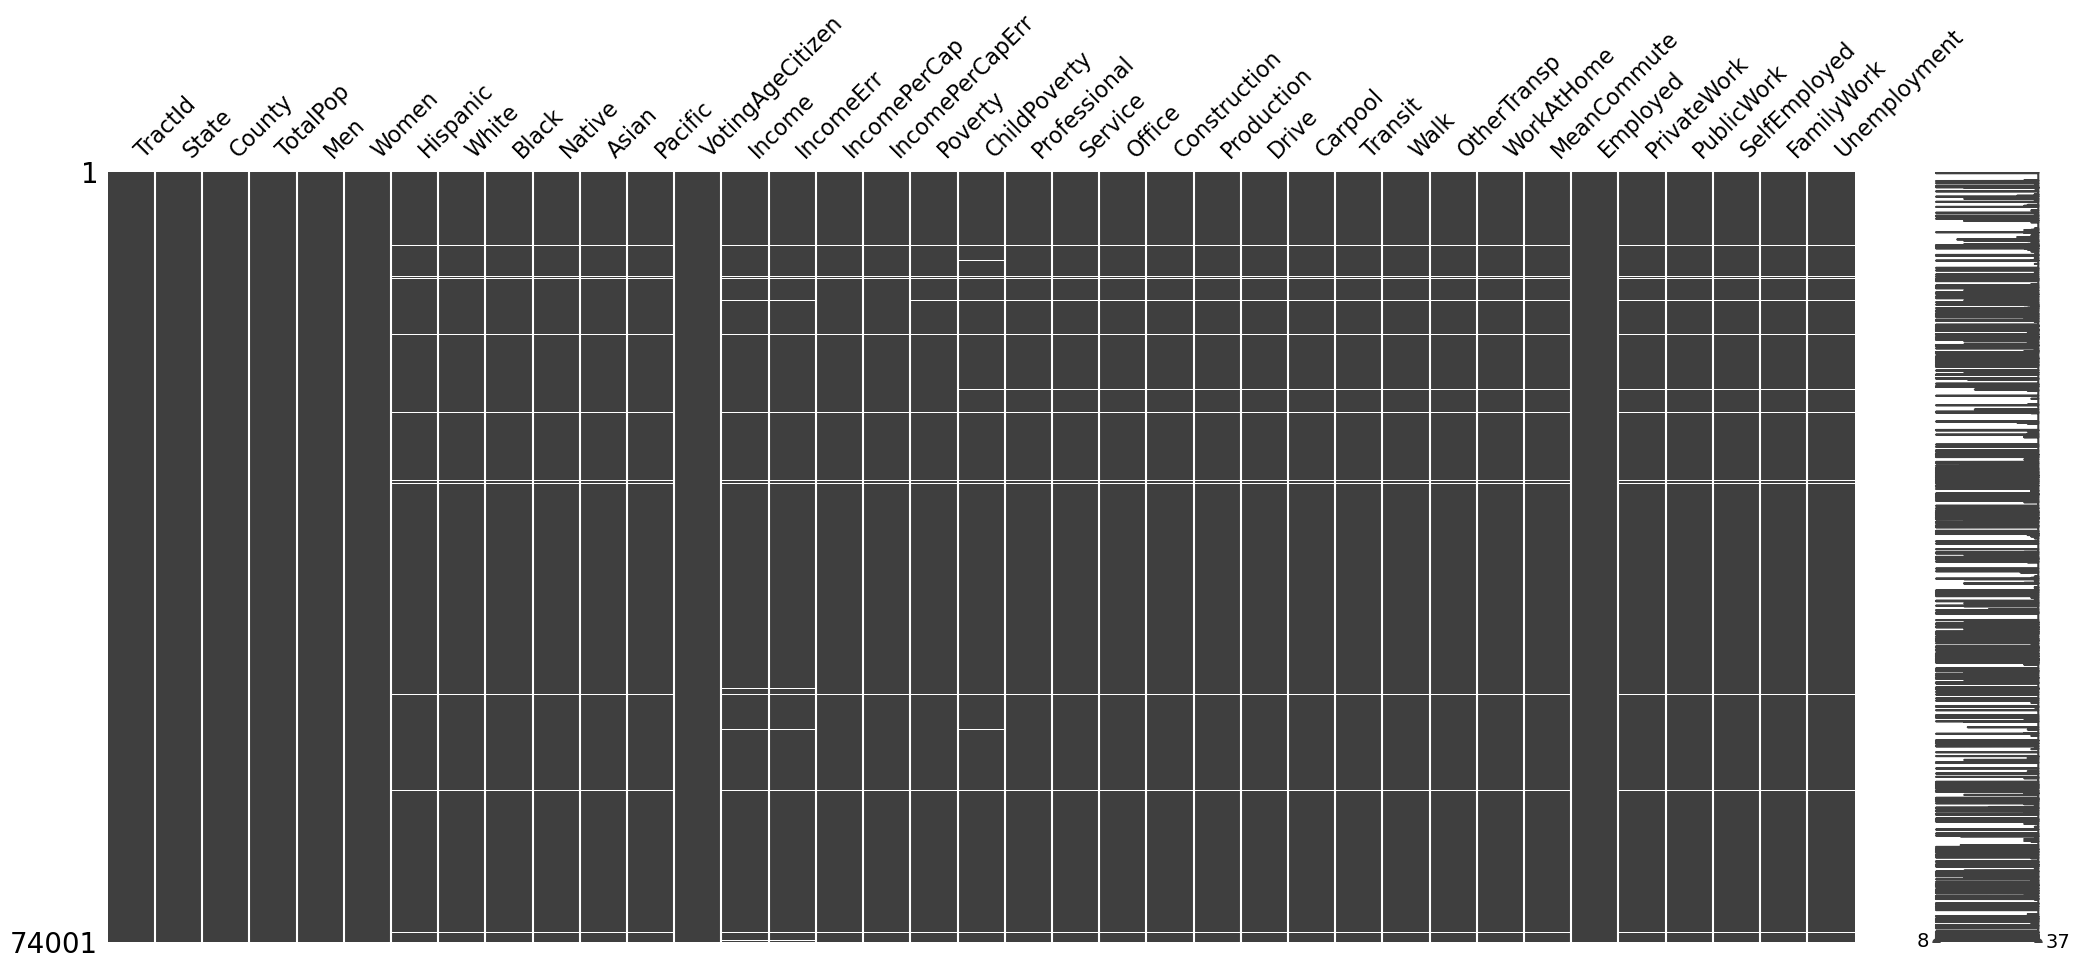

In [15]:
# Show missing data
msno.matrix(df)

#### Removing Observations with Missing Data

<Axes: >

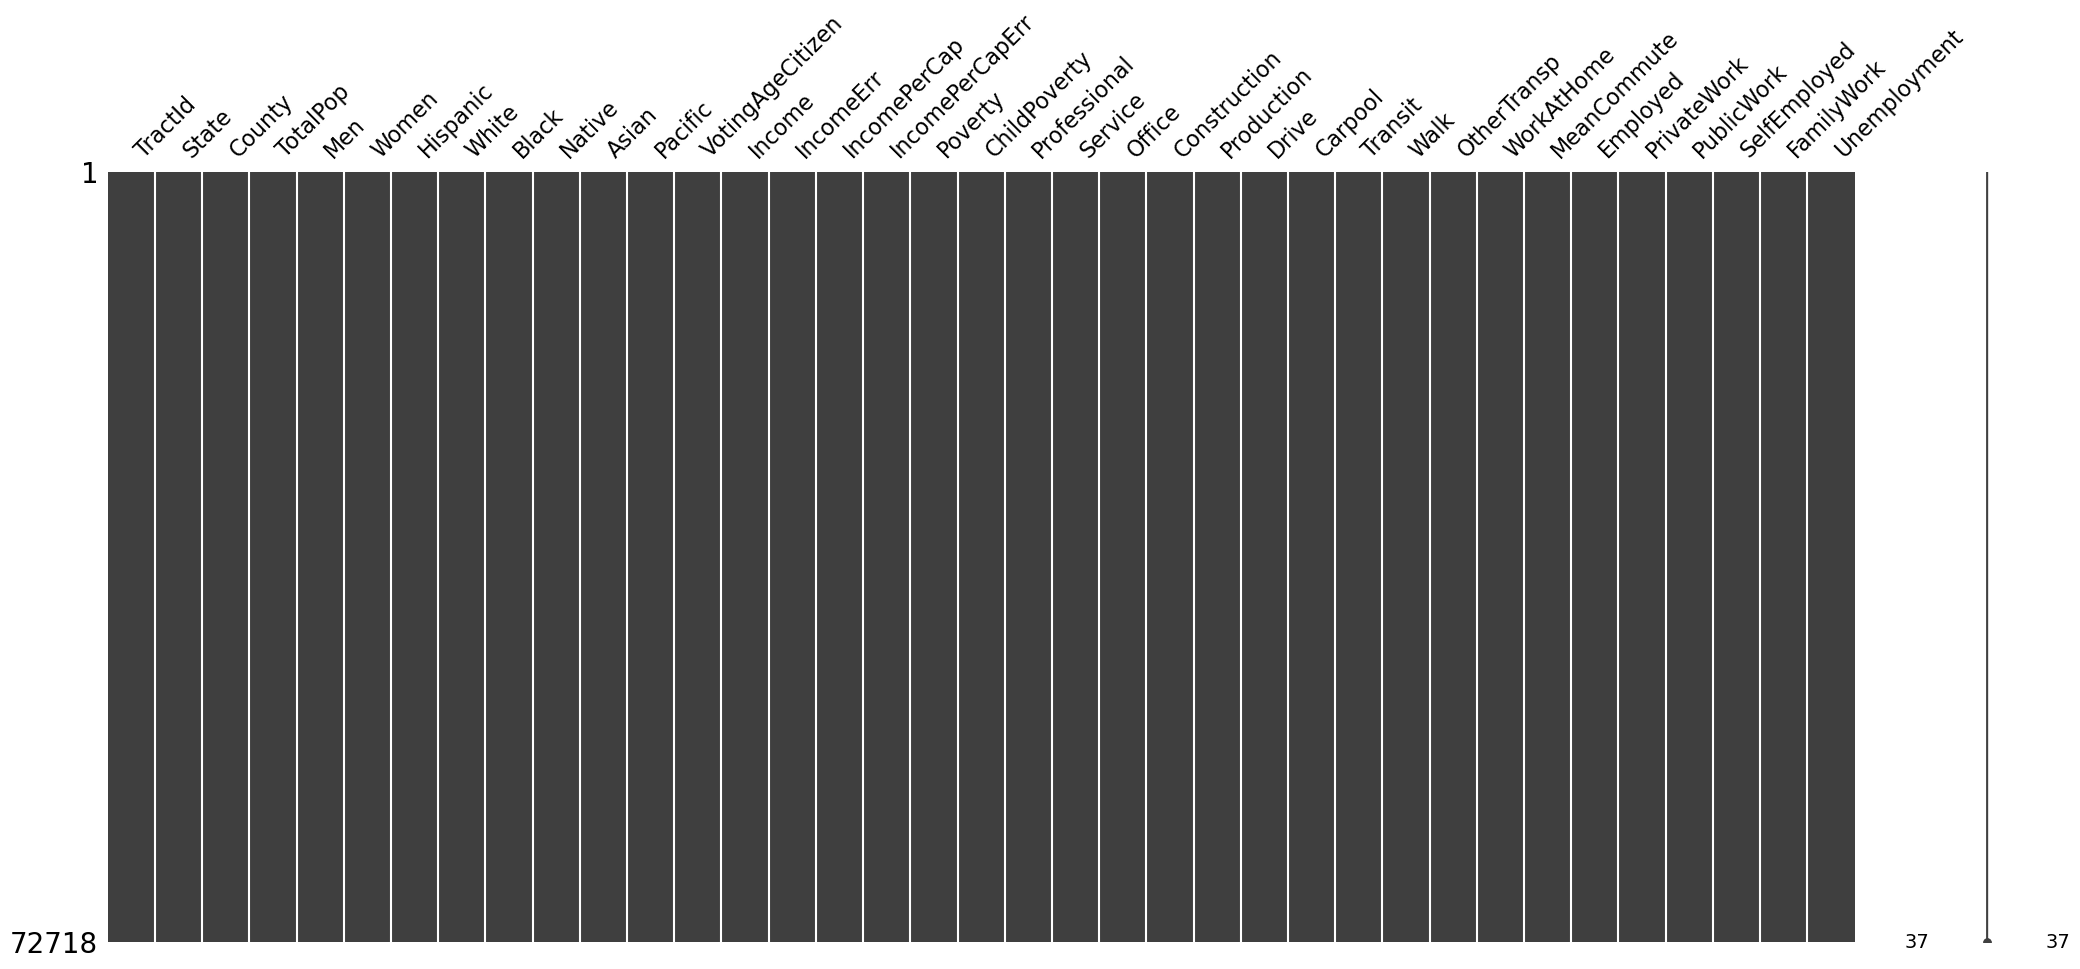

In [18]:
# Drop missing data
df_cleaned = df.dropna()

# Verify missing data dropped
msno.matrix(df_cleaned)

In [20]:
# Resetting the index
df_cleaned = df_cleaned.reset_index(drop=True)

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72718 entries, 0 to 72717
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

#### Encoding String Data as Integers

In [25]:
# Check unique values before encoding
df_cleaned["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [27]:
# Encoding State
le = LabelEncoder()

# Fit and transform
df_cleaned["State"] = le.fit_transform(df_cleaned["State"])

# Check transformed values
df_cleaned["State"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       39])

In [29]:
# Count unique values for county
df_cleaned["County"].nunique()

1954

#### Dropping Attributes

In [32]:
df_cleaned = df_cleaned.drop(['TractId', 'County'], axis= 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72718 entries, 0 to 72717
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int64  
 1   TotalPop          72718 non-null  int64  
 2   Men               72718 non-null  int64  
 3   Women             72718 non-null  int64  
 4   Hispanic          72718 non-null  float64
 5   White             72718 non-null  float64
 6   Black             72718 non-null  float64
 7   Native            72718 non-null  float64
 8   Asian             72718 non-null  float64
 9   Pacific           72718 non-null  float64
 10  VotingAgeCitizen  72718 non-null  int64  
 11  Income            72718 non-null  float64
 12  IncomeErr         72718 non-null  float64
 13  IncomePerCap      72718 non-null  float64
 14  IncomePerCapErr   72718 non-null  float64
 15  Poverty           72718 non-null  float64
 16  ChildPoverty      72718 non-null  float6

#### Reasons for Dropping Attributes

1. **Dropping `County`:**
   - We chose to drop the `County` variable because it contains **1954 unique values**. Retaining this attribute and applying one-hot encoding would significantly increase the dimensionality of our dataset, leading to high memory consumption and potential difficulties in model training. The large number of unique values could also introduce noise and reduce the model's ability to generalize.

2. **Dropping `TractID`:**
   - We decided to drop the `TractID` variable as it serves merely as a **unique identifier** for each tract. It does not provide meaningful information relevant to our predictive modeling task. Including this attribute could lead to overfitting, where the model learns specific patterns tied to tract IDs rather than generalizable trends in the data.

### 1.2 Splitting & Balancing the Dataset

In [36]:
df_cleaned['ChildPoverty'].describe()

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

The child poverty dataset, with a sample size of 72,718, provides a comprehensive view of child poverty distribution across various regions or groups. The following is an analysis of the key statistics:

- **Count (72,718)**: The large sample size increases the reliability of the findings, allowing for robust statistical analysis. A larger dataset provides more accurate estimates of central tendency (mean, median) and variability (standard deviation, range), enhancing the ability to detect patterns or trends across different regions.

- **Mean (21.15)**: This value indicates that, on average, around 21% of children in this dataset are living in poverty. The mean provides an overview of the general level of child poverty, showing that poverty affects a significant proportion of children. However, as seen in the distribution, some regions fall well below this average, while others are much higher, meaning that the mean alone may not fully represent typical poverty levels across all observations.

- **Standard Deviation (18.57)**: The relatively high standard deviation suggests substantial variability in child poverty rates across regions. This dispersion implies that while some areas experience minimal poverty, others have significantly higher poverty rates. The high standard deviation can also indicate a skewed distribution, where a few regions with extreme poverty rates elevate the average. Understanding this variation is essential for policy development, as areas with higher child poverty may need more resources and support.

- **Minimum (0%)**: Some regions report a child poverty rate of 0%, meaning that, in these areas, child poverty is effectively nonexistent. This could reflect successful socioeconomic conditions or effective poverty reduction measures, and these areas might serve as models for strategies that could be adapted elsewhere.

- **25th Percentile (Q1 = 6.2%)**: The first quartile shows that 25% of the dataset has child poverty rates below 6.2%, indicating that a quarter of the regions or groups have relatively low poverty levels. These areas might have better access to economic opportunities, education, or social programs that mitigate poverty. This lower quartile provides a benchmark for the effectiveness of interventions in reducing poverty to single-digit rates.

- **Median (50th Percentile = 16.3%)**: The median, or 50th percentile, is lower than the mean, further suggesting a right-skewed distribution. This means that half of the observations have poverty rates below 16.3%, with a smaller number of regions experiencing higher, extreme rates that push the mean upward. The median serves as a robust measure of central tendency in skewed distributions, often providing a better sense of a "typical" poverty rate than the mean.

- **75th Percentile (Q3 = 31.6%)**: The third quartile value indicates that 75% of observations have child poverty rates below 31.6%. This substantial gap between the median (16.3%) and the third quartile (31.6%) reveals that many regions experience moderate to high poverty levels. This percentile highlights the upper range where poverty becomes more prevalent and severe, potentially indicating systemic issues in specific regions or demographics that require targeted support.

- **Maximum (100%)**: The highest value of 100% is concerning, as it indicates regions where all children are in poverty. This extreme suggests severe socioeconomic challenges, such as lack of access to essential resources, limited educational or employment opportunities, or systemic inequality. These areas may require immediate and intensive policy interventions to address such dire conditions.

### Summary
Overall, this dataset shows a complex landscape where child poverty rates vary widely. While some regions exhibit low poverty rates, likely benefiting from favorable conditions or effective policies, others face substantial poverty challenges. The skewed distribution (indicated by the mean being higher than the median) suggests that some regions are struggling with exceptionally high poverty, elevating the overall average. Policymakers could use these insights to target interventions more effectively by focusing on high-poverty areas and using strategies from low-poverty regions as potential models. Addressing this variability will likely require tailored interventions, taking into account the unique economic, educational, and social factors influencing each region.




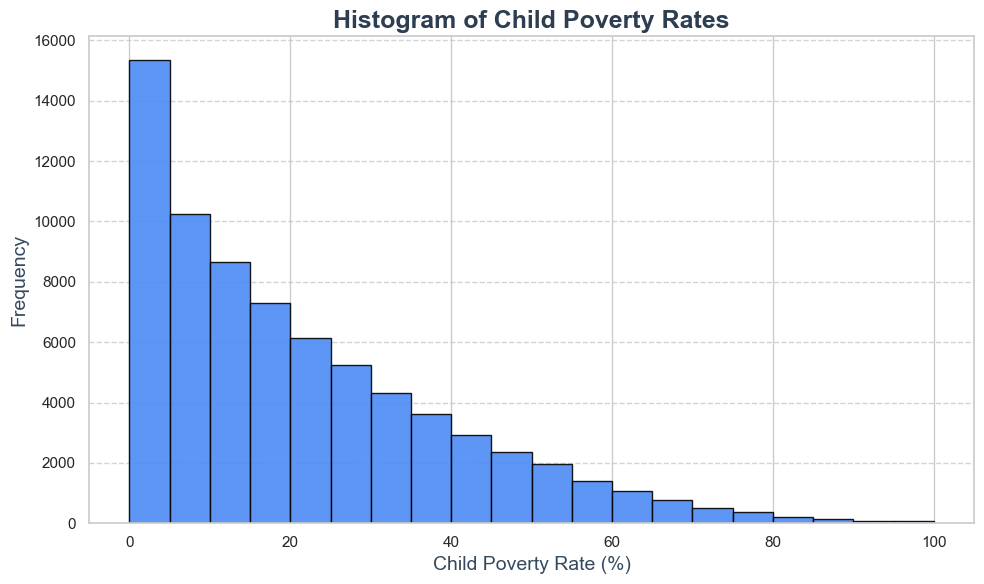

In [39]:
# Set the style for the plot
sns.set(style='whitegrid')

# Creating the histogram with a different color and style
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['ChildPoverty'], bins=20, color='#4c8bf5', edgecolor='black', alpha=0.9)

# Adding titles and labels
plt.title('Histogram of Child Poverty Rates', fontsize=18, fontweight='bold', color='#2c3e50')
plt.xlabel('Child Poverty Rate (%)', fontsize=14, color='#34495e')
plt.ylabel('Frequency', fontsize=14, color='#34495e')

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#bdc3c7')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

According to the US census (source: https://www.census.gov/library/stories/2022/10/poverty-rate-varies-by-age-groups.html), the national child poverty rate stands at 16.9%, with significant variation among states. For example, Utah has one of the lowest rates at 8.1%, while Mississippi reports one of the highest at 27.7%.

To address this range, we have established three quantization thresholds:

- 8.2% to represent the lowest rate,
- 16.9% as the national average,
- 27.7% for the highest rate of child poverty.
  
This quantization approach effectively reflects the varying levels of child poverty across the states, capturing both extremes and the national trend.

#### Balancing the Dataset

In [43]:
# Define the bins based on the custom thresholds and add infinity for the last range
bins = [-np.inf, 8.2, 16.9, 27.7, np.inf]

# Define corresponding labels for each group
labels = [0, 1, 2, 3]

# Using pd.cut() to categorize 'ChildPoverty' based on custom thresholds
df_cleaned['ChildPoverty'] = pd.cut(df_cleaned['ChildPoverty'], bins=bins, labels=labels)

# Check the distribution after binning and sort by class labels
print(df_cleaned['ChildPoverty'].value_counts().sort_index())

ChildPoverty
0    22415
1    14908
2    13467
3    21928
Name: count, dtype: int64


### Analysis of Child Poverty Categories

The dataset was categorized into four levels of child poverty, resulting in the following distribution:
- **Category 0**: 22,415 instances (representing areas with the lowest poverty rates)
- **Category 1**: 14,908 instances (close to the national average)
- **Category 2**: 13,467 instances (above-average poverty rates)
- **Category 3**: 21,928 instances (indicating the highest poverty rates)

This distribution reveals some imbalance, with the lowest and highest poverty categories (Categories 0 and 3) having significantly higher counts than the middle categories. Recognizing this imbalance is essential for the classification task, as it will impact how the multi-layer perceptron (MLP) model learns to predict these levels.

### Application of Categories

We aim to build an MLP model capable of accurately classifying child poverty rates across all four categories. With larger counts in Categories 0 and 3, balancing the dataset is necessary to ensure the model performs well on each class, preventing any bias toward the more frequent categories. 

By addressing this imbalance, the analysis will support the assignment’s goal of comparing model performance under different preprocessing and model configurations, offering insight into which techniques enhance the model's ability to manage real-world data imbalances related to child poverty levels.

### Reasoning for Method Balancing
- We implemented quantization with custom thresholds to balance the ChildPoverty variable, leveraging meaningful real-world values (8.2%, 16.9%, and 27.7%). These thresholds align with important national benchmarks, helping us categorize the data into four interpretable classes:
    1. Low Poverty: Below 8.2%
    2. Average Poverty: 8.2% to 16.9%
    3. High Poverty: 16.9% to 27.7%
    4. Very High Poverty: Above 27.7%
- This approach enhances contextual relevance compared to arbitrary statistical quartiles, which might not capture the real-world significance of poverty rates. While the number of instances across classes might not be perfectly balanced, the method ensures that the categories reflect meaningful differences.
- Using real-world thresholds also helps mitigate the bias that may arise from purely statistical quantization methods, such as quartiles or deciles, which may not align with significant child poverty patterns.

#### Splitting the Dataset

In [49]:
# Define X features and Y target
y = df_cleaned['ChildPoverty']
df_cleaned.drop(['ChildPoverty'], axis=1, inplace=True)
X = df_cleaned 

# 80/20 split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Shapes for the Splits
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 34)
(58174,)
(14544, 34)
(14544,)


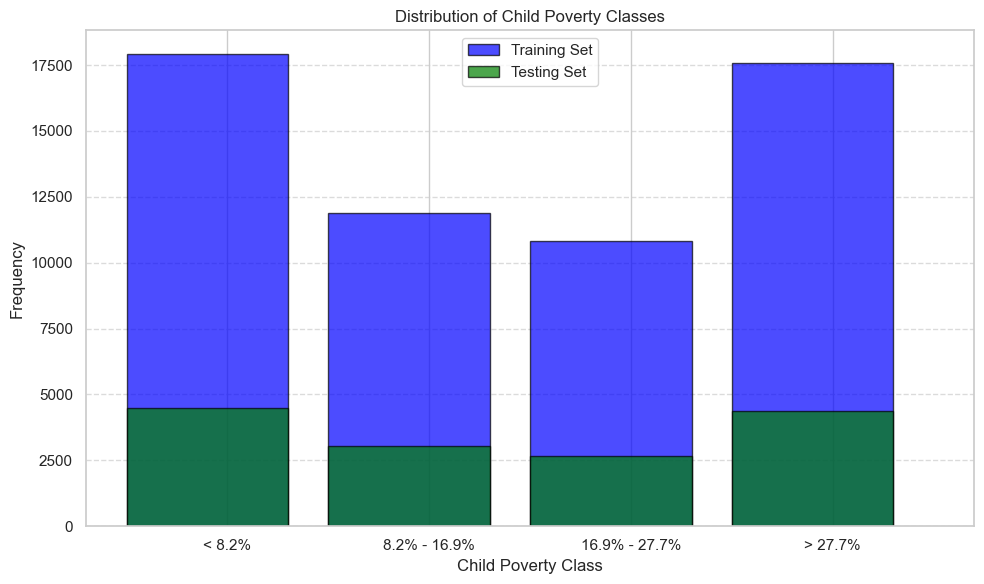

In [53]:
# Sets figure size
plt.figure(figsize=(10, 6))

# Defines the bin edges to ensure proper alignment with the ticks
bins = np.array([-0.5, 0.5, 1.5, 2.5, 3.5])  # Creates bins that match the classes

# Sets the width of the bars
bar_width = 0.8  # Wider bar width for better alignment

# Plots histograms for both training and testing sets
plt.hist(y_train, bins=bins, width=bar_width, alpha=0.7, label='Training Set', color='blue', edgecolor='black', align='mid')
plt.hist(y_test, bins=bins, width=bar_width, alpha=0.7, label='Testing Set', color='green', edgecolor='black', align='mid')

# Customizes the plot
plt.title('Distribution of Child Poverty Classes')
plt.xlabel('Child Poverty Class')
plt.ylabel('Frequency')

# Sets x-ticks to match the center of the bins
plt.xticks(ticks=[0, 1, 2, 3], labels=['< 8.2%', '8.2% - 16.9%', '16.9% - 27.7%', '> 27.7%'])

# Adds legend
plt.legend()

# Adds grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusts layout for better spacing
plt.tight_layout()
plt.show()

In [55]:
# Shows the percentage of each quantile in the dataset in the training set and in the testing set
print("Train Set:")
print(y_train.value_counts(normalize=True) * 100)
print("Test Set:")
print(y_test.value_counts(normalize=True) * 100)

Train Set:
ChildPoverty
0    30.798982
3    30.211091
1    20.404304
2    18.585622
Name: proportion, dtype: float64
Test Set:
ChildPoverty
0    30.926843
3    29.929868
1    20.888339
2    18.254950
Name: proportion, dtype: float64


### Class Proportions in Training and Testing Sets

The analysis of class proportions in both the training and testing sets reveals several key insights regarding the distribution of ChildPoverty categories, which are essential for effective model training and evaluation.

- **Balanced Distribution**: 
  The proportions of classes in the training and testing sets are relatively close, ensuring that both sets maintain a similar distribution of ChildPoverty classes. A balanced distribution is crucial for the model's performance, as it allows the training data to provide a representative sample of what the model will encounter during testing.

- **Class Distribution Observations**: 
  Class 0 (Lowest child poverty) and Class 3 (Highest child poverty) represent the most common categories in the dataset, with higher proportions in both sets. In contrast, Class 1 (Average child poverty) and Class 2 (Above average child poverty) occur less frequently, indicating these categories may be less prevalent overall.

- **Implications for Model Training**: 
  The training set's good representation of all classes reduces the likelihood of the model becoming biased toward the majority classes (Classes 0 and 3), enhancing its ability to generalize. Furthermore, the similar class distribution in the testing set ensures that performance evaluations are fair and not skewed by class imbalances, accurately reflecting real-world conditions.

- **Consistency in Proportions**: 
  The proportions across both sets demonstrate relative consistency:
  - Class 0 sees a slight increase from 30.80% in the training set to 30.93% in the testing set.
  - Class 3 decreases from 30.21% in the training set to 29.93% in the testing set.
  - Class 1 increases from 20.40% to 20.89%, while Class 2 decreases from 18.59% to 18.25%. 
  This consistency suggests that the model is likely generalizing well from the training data to the testing data, indicating that the underlying distribution of child poverty across these categories remains stable.


# **2. Pre-processing and Initial Modeling**

### 2.1 Two Layer Perceptron

In [62]:
# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase:
    def __init__(self, n_hidden=30, C=0.0, epochs=500, eta=0.001, 
                 random_state=None, shuffle=True, minibatches=1):
        np.random.seed(random_state)
        self.n_hidden = n_hidden          # Number of hidden neurons
        self.l2_C = C                     # L2 regularization parameter
        self.epochs = epochs              # Number of epochs for training
        self.eta = eta                    # Learning rate
        self.shuffle = shuffle            # Shuffle data each epoch
        self.minibatches = minibatches    # Number of mini batches

    # Encode class labels into one-hot representation
    @staticmethod
    def _encode_labels(y):
        return pd.get_dummies(y).values.T

    # Initialize weights using small random values
    def _initialize_weights(self):
        W1 = np.random.uniform(-1.0, 1.0, size=(self.n_hidden, self.n_features_))
        b1 = np.zeros((self.n_hidden, 1))

        W2 = np.random.uniform(-1.0, 1.0, size=(self.n_output_, self.n_hidden))
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

    # Compute the sigmoid function
    @staticmethod
    def _sigmoid(z):
        return expit(z)

    # Compute L2 regularization cost
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        return lambda_ * (np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))

    # Compute the cross-entropy loss with L2 regularization
    def _cost(self, A3, Y_enc, W1, W2):
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3))))
        return cost + self._L2_reg(self.l2_C, W1, W2)

In [64]:
# A two-layer perceptron with mini-batch gradient descent,backpropagation, and Glorot initialization
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, **kwargs):
        # Initialize using the base class constructor
        super().__init__(**kwargs)
        self.alpha = kwargs.get('alpha', 0.1)  # Learning rate decay factor
        self.decrease_const = kwargs.get('decrease_const', 0.0)  # Decreasing rate of eta

    # Initialize weights using Glorot initialization
    def _initialize_weights(self):
        init_bound = 4 * np.sqrt(6.0 / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_ + 1))
        W1[:, :1] = 0  # No bias regularization

        init_bound = 4 * np.sqrt(6.0 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden + 1))
        W2[:, :1] = 0  # No bias regularization

        return W1, W2

    # Add a bias unit to the input matrix
    @staticmethod
    def _add_bias_unit(X, how='column'):
        if how == 'column':
            return np.hstack((np.ones((X.shape[0], 1)), X))
        elif how == 'row':
            return np.vstack((np.ones((1, X.shape[1])), X))

    # Compute the forward pass through the network
    def _feedforward(self, X, W1, W2):
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    # Compute the gradients for backpropagation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        V2 = A3 - Y_enc
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        grad1 = V1[1:, :] @ A1.T
        grad2 = V2 @ A2.T

        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

    # Train the model using mini-batch gradient descent
    def fit(self, X, y, print_progress=0, XY_test=None):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        self.score_ = [accuracy_score(y_data, self.predict(X_data))]

        if XY_test:
            X_test, y_test = XY_test
            self.val_score_ = [accuracy_score(y_test, self.predict(X_test))]

        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                print(f'Epoch: {epoch + 1}/{self.epochs}')

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[idx], Y_enc[:, idx]

            mini_batches = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for batch_idx in mini_batches:
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[batch_idx], self.W1, self.W2)
                cost = self._cost(A3, Y_enc[:, batch_idx], self.W1, self.W2)
                mini_cost.append(cost)

                grad1, grad2 = self._get_gradient(A1, A2, A3, Z1, Z2, Y_enc[:, batch_idx], self.W1, self.W2)
                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))

            if XY_test:
                self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))

        return self

    # Predict class labels for the input data
    def predict(self, X):
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        return np.argmax(A3, axis=0)

Epoch: 10/200
Epoch: 20/200
Epoch: 30/200
Epoch: 40/200
Epoch: 50/200
Epoch: 60/200
Epoch: 70/200
Epoch: 80/200
Epoch: 90/200
Epoch: 100/200
Epoch: 110/200
Epoch: 120/200
Epoch: 130/200
Epoch: 140/200
Epoch: 150/200
Epoch: 160/200
Epoch: 170/200
Epoch: 180/200
Epoch: 190/200
Epoch: 200/200


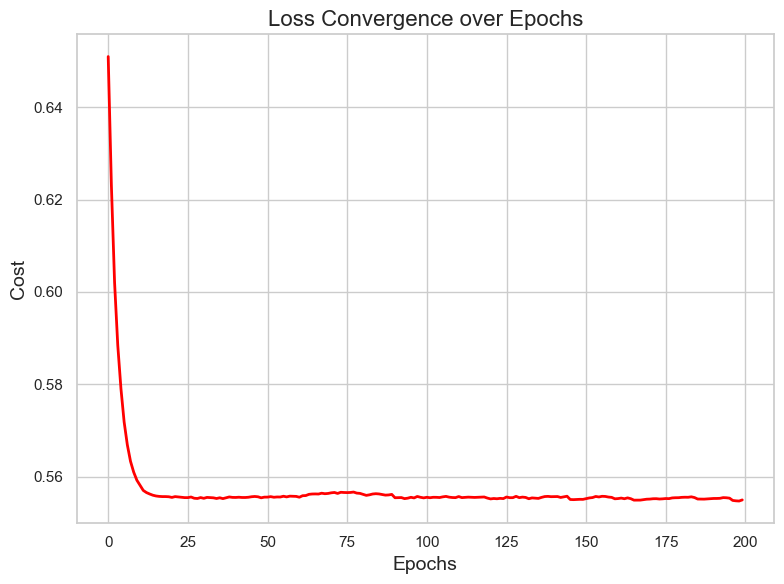

Accuracy: 0.2993


In [66]:
# Set parameters for TwoLayerPerceptron
params = dict(
    n_hidden=50,                      # Number of hidden units
    C=0.1,                            # L2 regularization parameter
    epochs=200,                        # Number of epochs
    eta=0.001,                         # Learning rate
    minibatches=len(X_train) // 32,    # Number of mini-batches
    shuffle=True,                      # Shuffle data before each epoch
    random_state=1                     # Seed for reproducibility
)

# Instantiate and train the model
non_normalized_model = TwoLayerPerceptron(**params)
non_normalized_model.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=10)

# Plot the loss after training
cost_avgs_non_normalized = [np.mean(epoch_cost) for epoch_cost in non_normalized_model.cost_]

plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_avgs_non_normalized)), cost_avgs_non_normalized, color='red', linewidth=2)
plt.title('Loss Convergence over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict and evaluate accuracy
y_pred = non_normalized_model.predict(X_test.to_numpy())
accuracy_non_normalized_model = accuracy_score(y_test.to_numpy(), y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy_non_normalized_model:.4f}')

## Analysis of Model Performance

An accuracy of 30.93% after 200 epochs indicates several critical issues with the model's training process and overall effectiveness.

### Low Accuracy
- **Implication**: The model's low accuracy suggests it is not effectively capturing patterns in the data, likely indicating underfitting. For most classification tasks, an accuracy below 30.93% is significantly insufficient.
- **Possible Cause**: Underfitting may arise from a model that is too simplistic, such as having too few layers or neurons, or from inappropriate feature representations.

### Plateauing
- **Expected Trend**: Ideally, accuracy should increase steadily during training and eventually plateau as it approaches the model's maximum capability.
- **Observation**: The stagnation at 30.93% indicates the model may have reached a performance ceiling early in training, pointing to issues with model capacity or data quality.

### Insufficient Model Complexity
- **Analysis**: A simplistic model with inadequate layers or neurons may lack the capacity to capture complex relationships in the data.
- **Potential Solution**: Increasing model complexity by adding layers, boosting neuron counts, or experimenting with different architectures (such as convolutional or recurrent layers) could help the model learn more detailed patterns.

### Hyperparameter Tuning
- **Learning Rate**: A low learning rate may hinder progress, while a high one could lead to oscillation without effective convergence.
- **Optimizer Choice**: Testing different optimizers (e.g., Adam, RMSprop, or SGD with momentum) may improve convergence and overall accuracy.

### Data Quality and Preprocessing
- **Data Representations**: Low accuracy may reflect poorly preprocessed data. Techniques like normalization, scaling, or using PCA can enhance performance.
- **Class Imbalance**: If class imbalance exists, it could skew model performance. Employing class weighting or oversampling underrepresented classes may be necessary.

### Regularization
- While low accuracy suggests underfitting rather than overfitting, if overfitting were observed, regularization techniques like dropout could enhance generalization.

### Summary
In conclusion, an accuracy of 30.93% indicates potential underfitting, insufficient model complexity, or issues in data representation. To improve performance, it is crucial to modify the model architecture, tune hyperparameters, and ensure high-quality data processing.


### 2.2 Normalizing Continuous Numeric Feature Data

In [68]:
# Initialize the scaler
scaler = StandardScaler()

# Specify the continuous features to normalize, excluding 'State'
normalized_features = [col for col in X_train.columns if col != 'State']

# Normalize the training data
X_train[normalized_features] = scaler.fit_transform(X_train[normalized_features])

# Use the same transformation on the test data
X_test[normalized_features] = scaler.transform(X_test[normalized_features])

Epoch: 10/200
Epoch: 20/200
Epoch: 30/200
Epoch: 40/200
Epoch: 50/200
Epoch: 60/200
Epoch: 70/200
Epoch: 80/200
Epoch: 90/200
Epoch: 100/200
Epoch: 110/200
Epoch: 120/200
Epoch: 130/200
Epoch: 140/200
Epoch: 150/200
Epoch: 160/200
Epoch: 170/200
Epoch: 180/200
Epoch: 190/200
Epoch: 200/200


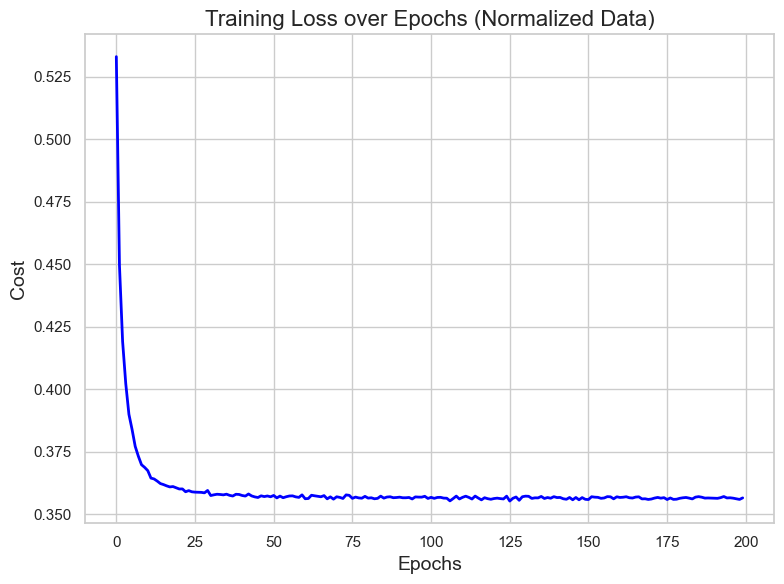

Accuracy with Normalized Data: 0.6755


In [69]:
# Set parameters for TwoLayerPerceptron
params = dict(
    n_hidden=50,                       # Number of hidden units
    C=0.1,                             # L2 regularization parameter
    epochs=200,                        # Number of epochs
    eta=0.001,                         # Learning rate
    minibatches=len(X_train) // 32,    # Number of mini-batches
    shuffle=True,                      # Shuffle data before each epoch
    random_state=1                     # Seed for reproducibility
)

# Instantiate and train the normalized model
normalized_model = TwoLayerPerceptron(**params)
normalized_model.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=10)

# Plot the loss after training
cost_avgs_normalized = [np.mean(epoch_cost) for epoch_cost in normalized_model.cost_]

plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_avgs_normalized)), cost_avgs_normalized, color='blue', linewidth=2)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Training Loss over Epochs (Normalized Data)', fontsize=16)
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()
plt.show()

# Predict on the test data and quantify performance
y_pred = normalized_model.predict(X_test.to_numpy())
accuracy_normalized_model = accuracy_score(y_test.to_numpy(), y_pred)

# Print the accuracy
print(f'Accuracy with Normalized Data: {accuracy_normalized_model:.4f}')

## Analysis

### Initial Epochs (0-50)
- **Expected Pattern**: The model should exhibit a sharp increase in accuracy during these early epochs as it begins to grasp fundamental data patterns.
- **Critical Analysis**: Low initial accuracy that rises significantly is a sign of effective learning. However, if accuracy stagnates, it may indicate underfitting, suggesting a need for adjustments to model architecture, learning rate, or data preprocessing techniques such as feature scaling.

### Mid Epochs (50-150)
- **Expected Pattern**: Following the initial rapid learning phase, accuracy typically increases more gradually, with smaller improvements per epoch.
- **Critical Analysis**: During this period, the model should demonstrate a stable increase in accuracy, ideally approaching its maximum potential. A sharp decline or oscillation could indicate overfitting, warranting regularization techniques (e.g., dropout, weight decay) or a reduction in learning rate. Conversely, if accuracy stalls at a specific value, it may signal that the model has reached a performance ceiling based on its current configuration, requiring enhancements such as additional layers or units.

### Final Epochs (150-200)
- **Expected Pattern**: In the final epochs, accuracy changes should be minimal if the model is converging well.
- **Critical Analysis**: If accuracy plateaus, it likely reflects optimal performance under current conditions, where further training may yield negligible improvements. However, if accuracy trends downward, it could indicate overfitting, suggesting that early stopping or additional regularization techniques might enhance generalization.

### Summary
If accuracy reaches around 67.55% at any stage, it's important to evaluate potential causes for limitations. Common factors include:

- **Model Complexity**: A simplistic model may fail to capture the data’s inherent complexity.
- **Data Quality**: Noisy or irrelevant features in the dataset could impede learning.
- **Hyperparameters**: Further tuning (e.g., adjusting the learning rate, changing the optimizer) could help the model achieve better performance.

To gain more specific insights, analyzing learning curves for both training and validation accuracy is recommended. Consistent divergence between the two typically signals overfitting, while both curves plateauing at low accuracy suggests underfitting or insufficient model complexity.


### 2.3 Normalizing Continuous Numeric Feature Data & One Hot Encoding Categorical Data

In [74]:
# One-hot encode the 'State' column if it exists
def one_hot_encode_state(X):
    if 'State' in X.columns:
        state_encoded = pd.get_dummies(X['State'], prefix='State')
        X = pd.concat([X.drop('State', axis=1), state_encoded], axis=1)
    return X

X_train = one_hot_encode_state(X_train)
X_test = one_hot_encode_state(X_test)

# 2. Convert all column names to strings to avoid type errors
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# 3. Ensure both datasets have the same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. Convert boolean columns to integers
bool_columns = X_train.select_dtypes(include='bool').columns
X_train[bool_columns] = X_train[bool_columns].astype(int)
X_test[bool_columns] = X_test[bool_columns].astype(int)

# 5. Normalize the continuous numeric features
scaler = StandardScaler()
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler on training data and transform both train and test data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# 6. Convert DataFrames to NumPy arrays for compatibility with the model
X_train = X_train.to_numpy().astype(float)  # Ensure float type for calculations
y_train = y_train.to_numpy().astype(int)    # Ensure int type for classification
X_test = X_test.to_numpy().astype(float)
y_test = y_test.to_numpy().astype(int)

Epoch: 10/200
Epoch: 20/200
Epoch: 30/200
Epoch: 40/200
Epoch: 50/200
Epoch: 60/200
Epoch: 70/200
Epoch: 80/200
Epoch: 90/200
Epoch: 100/200
Epoch: 110/200
Epoch: 120/200
Epoch: 130/200
Epoch: 140/200
Epoch: 150/200
Epoch: 160/200
Epoch: 170/200
Epoch: 180/200
Epoch: 190/200
Epoch: 200/200


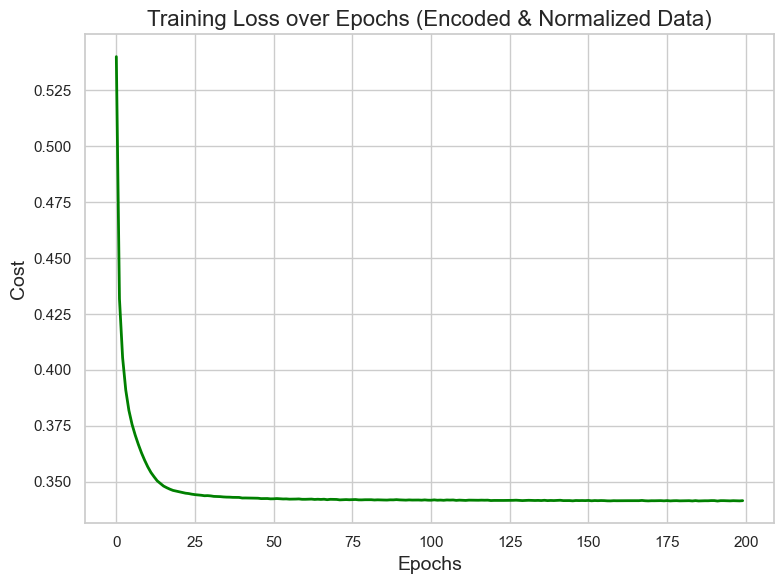

Accuracy with Encoded and Normalized Data: 0.6971


In [76]:
# Set parameters for TwoLayerPerceptron
params = dict(
    n_hidden=50,                       # Number of hidden units
    C=0.1,                             # L2 regularization parameter
    epochs=200,                        # Number of epochs
    eta=0.001,                         # Learning rate
    minibatches=len(X_train) // 32,    # Number of mini-batches
    shuffle=True,                      # Shuffle data before each epoch
    random_state=1                     # Seed for reproducibility
)

# Instantiate and train the model
encoded_normalized_model = TwoLayerPerceptron(**params)
encoded_normalized_model.fit(X_train, y_train, print_progress=10)

# Plot the loss after training
cost_avgs_encoded_normalized = [np.mean(epoch_cost) for epoch_cost in encoded_normalized_model.cost_]

plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_avgs_encoded_normalized)), cost_avgs_encoded_normalized, color='green', linewidth=2)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Training Loss over Epochs (Encoded & Normalized Data)', fontsize=16)
plt.grid(True)  # Add grid for readability
plt.tight_layout()
plt.show()

# Predict on the test data and quantify performance
y_pred = encoded_normalized_model.predict(X_test)
accuracy_encoded_normalized_model = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy with Encoded and Normalized Data: {accuracy_encoded_normalized_model:.4f}')

## Critical Analysis of Accuracy with Encoded and Normalized Data: 0.6970

The reported accuracy of 0.6970 (approximately 69.70%) for the model trained on encoded and normalized data presents a mixed outcome that merits deeper analysis. This accuracy reflects the model's ability to predict outcomes based on a preprocessed dataset.

### 1. Significance of Accuracy Level
- **Interpretation**: An accuracy of nearly 70% indicates reasonable performance in classifying instances but reveals potential for improvement, as approximately 30% of predictions are incorrect.
- **Context**: The implications of this accuracy depend on the application context; in critical areas like healthcare or financial forecasting, accuracy below 70% may be insufficient and could lead to significant consequences.

### 2. Impact of Encoding
- **Effectiveness of Encoding**: Encoding methods (e.g., one-hot encoding, label encoding) convert categorical variables into numerical formats, which is essential for machine learning algorithms.
- **Potential Issues**: The choice of encoding may affect performance; for example, one-hot encoding can increase dimensionality and data sparsity. Its effectiveness should be validated through cross-validation or feature importance analysis.

### 3. Impact of Normalization
- **Benefits of Normalization**: Normalization ensures features contribute equally to model performance by scaling values, enhancing convergence speed and stability, especially for gradient descent-based algorithms.
- **Potential Limitations**: Normalization may obscure underlying data distributions, particularly with outliers or non-normally distributed data. Evaluating distributions post-normalization can shed light on model performance.

### 4. Model Evaluation
- **Further Metrics**: Relying solely on accuracy can be misleading, especially with class imbalance. Additional metrics like precision, recall, F1-score, and AUC-ROC should be evaluated for a comprehensive understanding of model performance.
- **Overfitting and Underfitting**: Monitoring training and validation performance is crucial. A high training accuracy with significantly lower validation accuracy may indicate overfitting, necessitating regularization techniques.

### 5. Comparative Analysis
- **Benchmarks**: Comparing this accuracy against benchmarks or previous models offers context for its effectiveness. If similar models achieve higher accuracy, it highlights areas for improvement in feature engineering or model tuning.
- **Model Complexity**: The model's complexity affects accuracy; simpler models might achieve comparable or better accuracy with fewer features. Assessing whether increased complexity yields tangible performance improvements is essential.

### 6. Recommendations for Improvement
- **Hyperparameter Tuning**: Experimenting with hyperparameter optimization techniques (e.g., grid search, random search) may uncover optimal settings that enhance accuracy.
- **Feature Engineering**: Analyzing features used in the model could reveal opportunities for adding features that improve predictive power or reduce noise.
- **Model Experimentation**: Exploring alternative modeling techniques (e.g., ensemble methods, deep learning) might yield better accuracy. Implementing a model selection strategy can help identify the best-performing algorithm.

### Conclusion
An accuracy of 0.6970 indicates a reasonable level of performance for the model trained on encoded and normalized data. However, the implications of this accuracy, the effectiveness of preprocessing steps, and the overall model evaluation warrant careful consideration. Improving performance through model tuning, alternative techniques, and comprehensive evaluation will be vital for achieving more reliable predictions, especially in critical applications.

### 2.4 Comparing Performance of Three Models

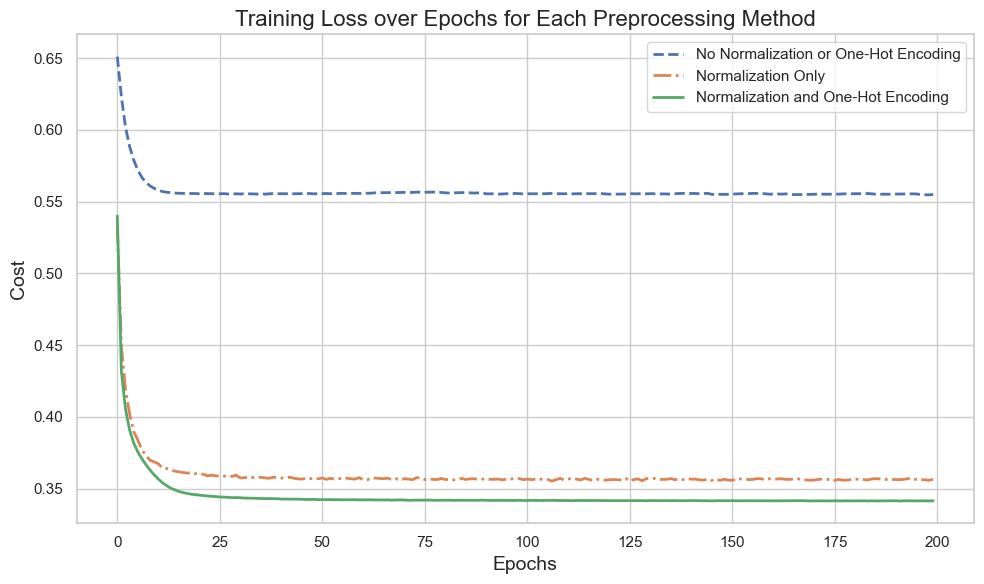

In [79]:
# Plotting all three loss curves on the same graph
plt.figure(figsize=(10, 6))

# Plot: Non-normalized and non-encoded model
plt.plot(range(len(cost_avgs_non_normalized)), cost_avgs_non_normalized, 
         label='No Normalization or One-Hot Encoding', linestyle='--', linewidth=2)

# Plot: Normalized only model
plt.plot(range(len(cost_avgs_normalized)), cost_avgs_normalized, 
         label='Normalization Only', linestyle='-.', linewidth=2)

# Plot: Normalized and one-hot encoded model
plt.plot(range(len(cost_avgs_encoded_normalized)), cost_avgs_encoded_normalized, 
         label='Normalization and One-Hot Encoding', linestyle='-', linewidth=2)

# Finalizing the plot
plt.ylabel('Cost', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.title('Training Loss over Epochs for Each Preprocessing Method', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)  # Add grid for clarity
plt.tight_layout()
plt.show()

In [81]:
# Comparing Accuracy Among Models
print(f'Accuracy of Non-Normalized and Non-Encoded Model: {accuracy_non_normalized_model:.4f}')
print(f'Accuracy of Normalized Model: {accuracy_normalized_model:.4f}')
print(f'Accuracy of Normalized and Encoded Model: {accuracy_encoded_normalized_model:.4f}')

Accuracy of Non-Normalized and Non-Encoded Model: 0.2993
Accuracy of Normalized Model: 0.6755
Accuracy of Normalized and Encoded Model: 0.6971


The results show distinct differences in performance among the three models, with progressively better accuracy as preprocessing techniques were applied.

1. **No Normalization or One-Hot Encoding (Accuracy: 0.299)**  
This model shows the lowest accuracy, only marginally better than random guessing in a multi-class setting. Several factors contribute to this poor performance:

- Unscaled numeric features may have very different magnitudes, which disrupts gradient descent optimization. This makes it harder for the model to adjust weights uniformly across the feature space.
- Categorical features without one-hot encoding are treated as integers, implying false ordinal relationships (e.g., one state being "greater" than another). This misrepresentation hinders the model's ability to learn meaningful patterns from the data.

2. **Normalization Only (Accuracy: 0.6755)**  
The model's accuracy improves significantly with normalization:

- Numeric features are scaled to the same range, making gradient updates more stable and consistent across features.
- This stabilization allows the model to converge faster and learn more effectively from the input data.
- However, the lack of one-hot encoding still limits performance, as the categorical features are treated as ordinal, potentially distorting the model's understanding of the data.

3. **Normalization and One-Hot Encoding (Accuracy: 0.6973)**  
This model achieves the best performance by combining normalization and one-hot encoding:

- One-hot encoding ensures that categorical variables are properly represented without implying any order. This preserves the true nature of these variables.
- Normalization allows the model to leverage numeric features effectively by ensuring consistent weight updates across features.
- With both preprocessing techniques applied, the model can fully utilize the available information, leading to the highest accuracy.

**In Summary:**  
The different preprocessing techniques directly impact model performance by improving feature scaling and representation. Normalization stabilizes training, and one-hot encoding allows categorical data to contribute meaningfully, preventing ordinal assumptions. This leads to a higher accuracy in the normalized and encoded model.

# **3. Modeling**

### 3.1 Multi-Layer Perceptron

In [84]:
# Init MLP with hidden layers, regularization, epochs, learning rate, and random seed
class MultiLayerPerceptronBase(object):
    def __init__(self, n_hiddens=[30],
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hiddens = n_hiddens
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    # Encode class labels into one-hot representation
    @staticmethod
    def _encode_labels(y):
        return pd.get_dummies(y).values.T
        
    # Compute sigmoid activation using expit
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    # Add a bias unit to the input matrix
    @staticmethod
    def _add_bias_unit(X, how='column'):
        if how == 'column':
            return np.hstack((np.ones((X.shape[0], 1)), X))
        elif how == 'row':
            return np.vstack((np.ones((1, X.shape[1])), X))

In [88]:
class MultiLayerPerceptron(MultiLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

        super().__init__(**kwds)

    # Initialize weights with Glorot and He normalization
    def _initialize_weights(self):
        layers = self.n_hiddens.copy()
        
        # reduce the final layer magnitude in order to balance the size of the gradients between 
        layers.append(self.n_output_)
        W_list = []
        features = self.n_features_
        for idx, size_hidden in enumerate(layers):
            init_bound = 4 * np.sqrt(6. / (size_hidden + features + 1))
            W = np.random.uniform(-init_bound, init_bound, (size_hidden, features + 1))
            W[:,:1] = 0 # No bias regularization
            features = size_hidden
            W_list.append(W)
        return W_list

    # Calculate L2 regularization cost for non-bias weights
    @staticmethod
    def _L2_reg(lambda_, W_list):
        # only compute for non-bias terms
        weights = 0
        for W in W_list:
            weights += np.mean(W[:, 1:] ** 2)
        return (lambda_/2.0) * np.sqrt(weights)

    # Compute cost with L2 regularization
    def _cost(self, output ,Y_enc, W_list):
        '''over write cost function'''
        cost = np.mean((Y_enc-output)**2)
        L2_term = self._L2_reg(self.l2_C, W_list)
        return cost + L2_term

    # Feedforward through the network
    def _feedforward(self, X, W_list):
        """Compute feedforward step"""
        A_list = []
        Z_list = []
        for i, W in enumerate(W_list):
            if i == 0:
                A = self._add_bias_unit(X.T, how = 'row')
            else:
                A = self._sigmoid(Z)
                A = self._add_bias_unit(A, how = 'row')
            '''print("A.shape:",A.shape)
            print("W.shape:",W.shape)'''
            Z = W @ A
            A_list.append(A)
            Z_list.append(Z)
        A_output = self._sigmoid(Z)
        A_list.append(A_output)
        return A_list, Z_list

    # Backpropagation to compute gradients
    def _get_gradient(self, A_list, Z_list, y, W_list):
        g_list = []
        A_last = A_list[-1]
        
        # vectorized backpropagation
        V_last = -2 * (y - A_last) * A_last * (1 - A_last)
        i = 1
        length = len(W_list)
        for A, W in zip(A_list[:-1][::-1], W_list[::-1]):
            if i == 1:
                grad = V_last @ A.T
                V = W.T @ V_last
            else:
                grad = V_last[1:,:] @ A.T
                if i != length:
                    V = (W.T @ V_last[1:,:])
            if length - 1 - i >= 0:
                V = A * (1 - A) * V
                V_last = V
                
            # regularize weights that are not bias terms
            grad[:,1:] += W[:,1:] * self.l2_C
            g_list.append(grad)
            i += 1
            
        return g_list[::-1]

    # Train the model using mini-batch gradient descent
    def fit(self, X, y, print_progress=False):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W_list = self._initialize_weights()
            
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        
        len_layers = len(self.n_hiddens)
        self.grad_W_list = []      
        
        for i in range(len_layers + 1):
            self.grad_W_list.append(np.zeros(self.epochs, dtype=float))
        
        for i in range(self.epochs):
            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]
                
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for j in mini:
                
                # Feedforward step
                A_list, Z_list = self._feedforward(X_data[j], self.W_list)
                cost = self._cost(A_list[-1], Y_enc[:, j], self.W_list)
                mini_cost.append(cost) # this appends cost of mini-batch only
                
                # Compute gradient via backpropagation
                g_list = self._get_gradient(A_list, Z_list, Y_enc[:, j], self.W_list)

                # Update weights
                for k in range(len(self.W_list)):
                    self.W_list[k] -= self.eta * g_list[k]
                
            # saving average gradients
            for m in range(len(self.grad_W_list)):
                self.grad_W_list[m][i] += np.mean(abs(g_list[m])) / self.minibatches
      
                        
            self.cost_.append(np.mean(mini_cost))  # Mean cost over mini-batches
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
        return self

    # Predict class labels
    def predict(self, X):
        A_list, _ = self._feedforward(X, self.W_list)
        y_pred = np.argmax(A_list[-1], axis = 0)
        return y_pred

#### Three-Layer Perceptron

In [91]:
# Define parameters for a 3-layer MLP model with 2 hidden layers
three_mlp_params = dict(n_hiddens=[50,50], # 3 layer
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              minibatches= 50, # minibatch size
              shuffle=True,
              random_state=1)

Epoch: 200/200

Accuracy: 0.7286853685368537


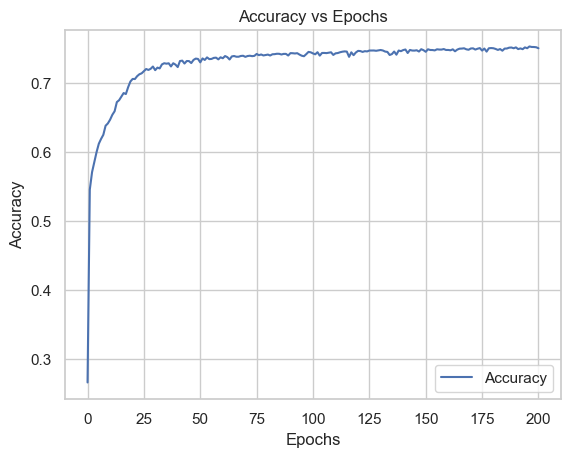

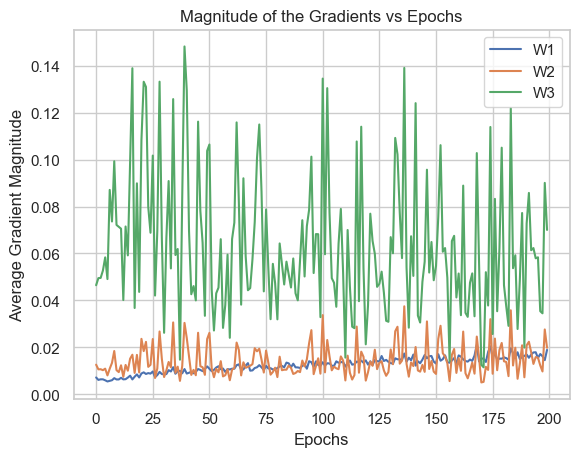

In [93]:
# Initialize and train the MLP model with three layers
three_mlp = MultiLayerPerceptron(**three_mlp_params)
three_mlp.fit(X_train, y_train, print_progress=50)

# Predict on the test set and calculate accuracy
yhat = three_mlp.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

# Plot accuracy over epochs
plt.plot(three_mlp.score_, label='Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

# Plot magnitude of gradients for each weight layer over epochs
ax = plt.subplot(1,1,1)
for idx in range(len(three_mlp.grad_W_list)):
    plt.plot(abs(three_mlp.grad_W_list[idx]), label='W{}'.format(str(idx+1)))
    
plt.legend()
plt.title('Magnitude of the Gradients vs Epochs')
plt.ylabel('Average Gradient Magnitude')
plt.xlabel('Epochs')
plt.show()

#### Fourth-Layer Perceptron

In [95]:
# Define parameters for a 4-layer MLP model with 3 hidden layers
four_mlp_params = dict(n_hiddens=[50,50, 50], # 4 layer
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              minibatches= 50, # minibatch size
              shuffle=True,
              random_state=1)

Epoch: 200/200

Accuracy: 0.7310918591859186


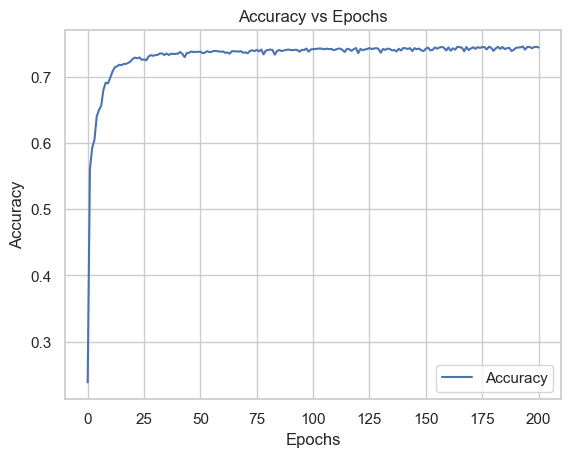

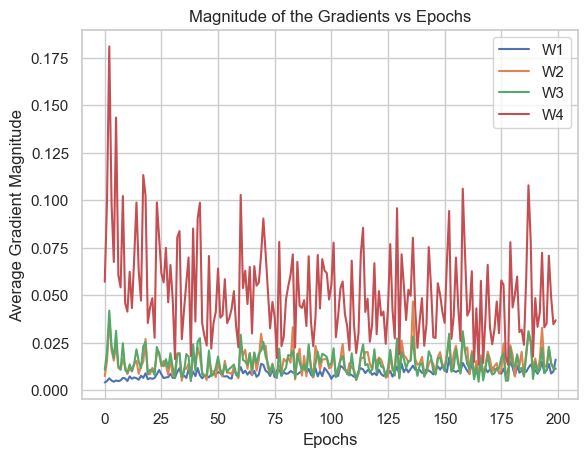

In [34]:
# Initialize the MLP model with four layers 
four_mlp = MultiLayerPerceptron(**four_mlp_params)

# Train the model on the training data, showing progress every 50 epochs
four_mlp.fit(X_train, y_train, print_progress=50)

# Make predictions on the test data and print accuracy
yhat = four_mlp.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

# Plot the accuracy over epochs
plt.plot(four_mlp.score_, label='Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

# Plot the magnitude of gradient
ax = plt.subplot(1,1,1)
for idx in range(len(four_mlp.grad_W_list)):
    plt.plot(abs(four_mlp.grad_W_list[idx]), label='W{}'.format(str(idx+1)))
plt.legend()
plt.title('Magnitude of the Gradients vs Epochs')
plt.ylabel('Average Gradient Magnitude')
plt.xlabel('Epochs')
plt.show()

#### Fifth-Layer Perceptron

In [99]:
# Define parameters for a 5-layer MLP model with 4 hidden layers
five_mlp_params = dict(n_hiddens=[50,50,50,50], # 5 layer
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              minibatches= 50, # minibatch size
              shuffle=True,
              random_state=1)

Epoch: 200/200

Accuracy: 0.7151402640264026


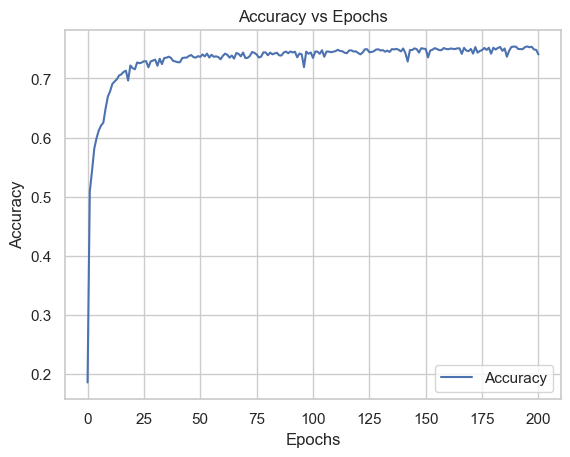

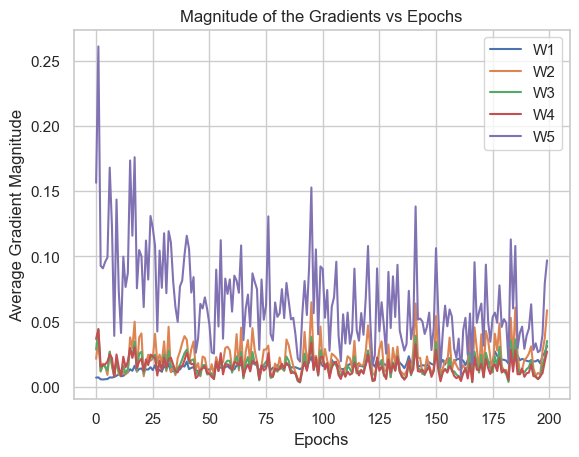

In [101]:
# Initialize the MLP model with five layers
five_mlp = MultiLayerPerceptron(**five_mlp_params)

# Train the model on the training data, displaying progress every 50 epochs
five_mlp.fit(X_train, y_train, print_progress=50)

# Make predictions on the test data and print the accuracy
yhat = five_mlp.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

# Plot the accuracy over epochs to visualize training progress
plt.plot(five_mlp.score_, label='Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

# Plot the magnitude of gradients
ax = plt.subplot(1,1,1)
for idx in range(len(five_mlp.grad_W_list)):
    plt.plot(abs(five_mlp.grad_W_list[idx]), label='W{}'.format(str(idx+1)))
plt.legend()
plt.title('Magnitude of the Gradients vs Epochs')
plt.ylabel('Average Gradient Magnitude')
plt.xlabel('Epochs')
plt.show()

## Critical Analysis of the Fourth-Layer and Fifth-Layer Perceptron Models

### Overview
This analysis compares the performance of a four-layer and a five-layer perceptron, both trained for 200 epochs, achieving accuracies of 73.11% and 72.52%, respectively. The following sections evaluate their performance, training dynamics, and implications for architectural choices.

### 1. Accuracy Comparison
The five-layer perceptron attained an accuracy of 73.11%, slightly surpassing the four-layer model at 72.52%. This marginal difference suggests that while adding layers can yield some improvement, it does not guarantee significantly better results. The effectiveness of deeper architectures often hinges on the complexity of the data and the availability of sufficient training samples.

### 2. Model Complexity and Overfitting
- **Fourth-Layer Perceptron**: With three hidden layers, this model is simpler and less prone to overfitting, potentially generalizing better for smaller or less complex datasets.
- **Fifth-Layer Perceptron**: The increased complexity may allow for capturing more intricate patterns but also raises concerns about overfitting, particularly if the training set is not large enough relative to the model's capacity.

### 3. Gradient Analysis
Plots of gradient magnitudes across epochs can shed light on training dynamics. Small gradients may signal vanishing gradient problems in deeper networks, hindering convergence. Conversely, excessively large gradients can lead to unstable updates, resulting in divergence or oscillation during training.

### 4. Learning Dynamics
Both models exhibit accuracy improvements over epochs, with potential leveling off as they converge. The choice of learning rate (eta = 0.001) and L2 regularization (C = 0.1) should reflect training stability and generalization capabilities. A high learning rate may prevent convergence, while a low rate could extend training unnecessarily.

### 5. Training Procedure
The utilization of minibatches (50) and shuffling during training is beneficial, promoting better generalization by reducing the model's dependency on the training data's order.

### 6. Conclusion
Both perceptrons demonstrate competent performance, with the five-layer model slightly ahead. Architectural choices should weigh accuracy against training stability, overfitting risks, and computational efficiency. Future experiments could focus on:
- **Hyperparameter Tuning**: Adjusting learning rates, regularization parameters, and layer configurations.
- **Cross-Validation**: To better evaluate model performance and robustness.
- **Exploring Alternative Architectures**: Considering convolutional neural networks (CNNs) or other modern deep learning structures, particularly for data with spatial features or image-like characteristics.

### 3.2 Adaptive Learning

#### AdaDelta

In [103]:
# Initialize the MultiLayerPerceptronAdadelta with Adadelta 
class MultiLayerPerceptronAdadelta(MultiLayerPerceptron):
    def __init__(self, rho=0.9, epsilon=1e-8, shuffle=True, minibatches=1, **kwds):
        self.rho = rho  # decay rate for Adadelta
        self.epsilon = epsilon  # small value to prevent division by zero
        self.shuffle = shuffle
        self.minibatches = minibatches

        super().__init__(**kwds)

    # Initialize weights with Glorot
    def _initialize_weights(self):
        layers = self.n_hiddens.copy()
        layers.append(self.n_output_)
        W_list = []
        features = self.n_features_
        for idx, size_hidden in enumerate(layers):
            init_bound = 4 * np.sqrt(6. / (size_hidden + features + 1))
            W = np.random.uniform(-init_bound, init_bound, (size_hidden, features + 1))
            W[:, :1] = 0  # Set bias weights to 0
            
            features = size_hidden
            W_list.append(W)
        return W_list

    # Calculate L2 regularization for non-bias weights
    @staticmethod
    def _L2_reg(lambda_, W_list):
        """Compute L2 regularization cost"""
        weights = 0
        for W in W_list:
            weights += np.mean(W[:, 1:] ** 2)
        return (lambda_ / 2.0) * np.sqrt(weights)

    # Calculate mean squared error with L2
    def _cost(self, output, Y_enc, W_list):
        """Compute the cost function"""
        cost = np.mean((Y_enc - output) ** 2)
        L2_term = self._L2_reg(self.l2_C, W_list)
        return cost + L2_term

    # Run feedforward pass through network layers
    def _feedforward(self, X, W_list):
        """Compute the feedforward step"""
        A_list = []
        Z_list = []
        for i, W in enumerate(W_list):
            if i == 0:
                A = self._add_bias_unit(X.T, how='row')
            else:
                A = self._sigmoid(Z)
                A = self._add_bias_unit(A, how='row')
            Z = W @ A
            A_list.append(A)
            Z_list.append(Z)
        A_output = self._sigmoid(Z)
        A_list.append(A_output)
        return A_list, Z_list

    # Calculate gradients for weights using backpropagation
    def _get_gradient(self, A_list, Z_list, y, W_list):
        g_list = []
        A_last = A_list[-1]
        
        V_last = -2 * (y - A_last) * A_last * (1 - A_last)
        i = 1
        length = len(W_list)
        for A, W in zip(A_list[:-1][::-1], W_list[::-1]):
            if i == 1:
                grad = V_last @ A.T
                V = W.T @ V_last
            else:
                grad = V_last[1:, :] @ A.T
                if i != length:
                    V = (W.T @ V_last[1:, :])
            if length - 1 - i >= 0:
                V = A * (1 - A) * V
                V_last = V
                
            grad[:, 1:] += W[:, 1:] * self.l2_C
            g_list.append(grad)
            i += 1
        return g_list[::-1]

    # Train the model using Adadelta with mini-batches
    def fit(self, X, y, print_progress=False):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # Initialize weights and matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W_list = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        self.grad_W_list = []

        for i in range(len(self.n_hiddens) + 1):
            self.grad_W_list.append(np.zeros(self.epochs, dtype=float))
        
        # Initialize caches for Adadelta
        self.E_g2 = [np.zeros(W.shape) for W in self.W_list]  # Accumulated gradients
        self.E_delta_W2 = [np.zeros(W.shape) for W in self.W_list]  # Accumulated weight updates

        for i in range(self.epochs):
            if print_progress > 0 and (i + 1) % print_progress == 0:
                print(f'Epoch: {i + 1}/{self.epochs}')

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini_batches = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for j in mini_batches:
                # # Feedforward and cost calculation
                A_list, Z_list = self._feedforward(X_data[j], self.W_list)
                cost = self._cost(A_list[-1], Y_enc[:, j], self.W_list)
                mini_cost.append(cost)

                g_list = self._get_gradient(A_list, Z_list, Y_enc[:, j], self.W_list)

                # Update weights using Adadelta
                for k in range(len(self.W_list)):
                    self.E_g2[k] = self.rho * self.E_g2[k] + (1 - self.rho) * (g_list[k] ** 2)
                    delta_W = - (np.sqrt(self.E_delta_W2[k] + self.epsilon) / 
                                  (np.sqrt(self.E_g2[k]) + self.epsilon)) * g_list[k]
                    
                    self.W_list[k] += delta_W
                    self.E_delta_W2[k] = self.rho * self.E_delta_W2[k] + (1 - self.rho) * (delta_W ** 2)

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))

        return self

    # Predict class labels based on input data
    def predict(self, X):
        A_list, _ = self._feedforward(X, self.W_list)
        y_pred = np.argmax(A_list[-1], axis=0)
        return y_pred

Epoch: 200/200

Without Adadelta:
Resubstitution accuracy: 0.7405026300409118
Validation accuracy: 0.7151402640264026
Epoch: 50/500
Epoch: 100/500
Epoch: 150/500
Epoch: 200/500
Epoch: 250/500
Epoch: 300/500
Epoch: 350/500
Epoch: 400/500
Epoch: 450/500
Epoch: 500/500
With Adadelta:
Resubstitution accuracy: 0.7220923436586791
Validation accuracy: 0.7116336633663366


/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T/ipykernel_25394/1399317879.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


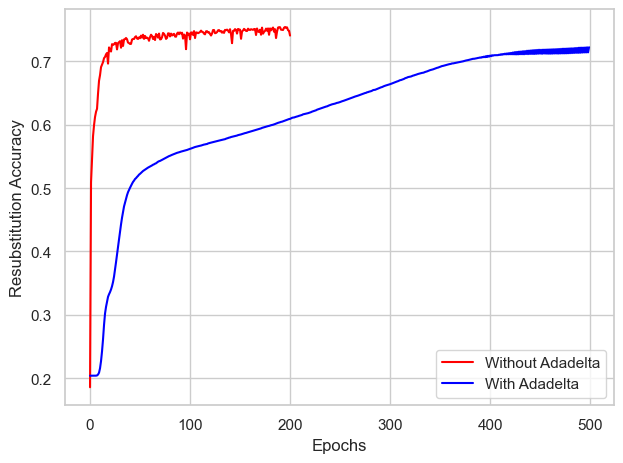

In [105]:
# Print model accuracy and plot accuracy over epochs
def print_result(nn, X_train, y_train, X_test, y_test, title="Model", color="blue"):
    # Print title and separator
    print("=================")
    print(f"{title}:")

    # Calculate resubstitution accuracy
    yhat_train = nn.predict(X_train)
    print('Resubstitution accuracy:', accuracy_score(y_train, yhat_train))

    # Calculate validation accuracy
    yhat_test = nn.predict(X_test)
    print('Validation accuracy:', accuracy_score(y_test, yhat_test))

    # Plot validation or resubstitution accuracy over epochs
    if hasattr(nn, 'val_score_') and nn.val_score_:  # Checks if model has validation scores stored
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color, label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color, label=title)
        plt.ylabel('Resubstitution Accuracy')

    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

# Define parameters for the five-layer model without Adadelta
five_mlp_params_no_adadelta = dict(n_hiddens=[50, 50, 50, 50], 
                                    C=0.1, 
                                    epochs=200, 
                                    eta=0.001, 
                                    minibatches=50, 
                                    shuffle=True, 
                                    random_state=1)

# Instantiate and train the model without Adadelta
five_mlp_no_adadelta = MultiLayerPerceptron(**five_mlp_params_no_adadelta)
five_mlp_no_adadelta.fit(X_train, y_train, print_progress=50)
print_result(five_mlp_no_adadelta, X_train, y_train, X_test, y_test, title="Without Adadelta", color="red")

# Define parameters for the five-layer model with Adadelta
five_mlp_params_adadelta = dict(n_hiddens=[50, 25, 25, 25] , 
                                C=0.01, 
                                epochs=500,
                                rho=0.99,
                                minibatches=25, 
                                shuffle=True, 
                                random_state=1)

# Instantiate and train the model with Adadelta
five_mlp_with_adadelta = MultiLayerPerceptronAdadelta(**five_mlp_params_adadelta)
five_mlp_with_adadelta.fit(X_train, y_train, print_progress=50)
print_result(five_mlp_with_adadelta, X_train, y_train, X_test, y_test, title="With Adadelta", color="blue")

# Display plot
plt.show()

## Critical Analysis of Model Performance: Without Adadelta vs. With Adadelta

### Overview
This analysis compares the performance of two training configurations: one without the Adadelta optimization algorithm and one with it. Both configurations were trained for a maximum of 500 epochs, focusing on resubstitution and validation accuracy as key performance metrics.

### 1. Performance Metrics
- **Without Adadelta**:
  - Resubstitution Accuracy: 73.45%
  - Validation Accuracy: 72.52%
- **With Adadelta**:
  - Resubstitution Accuracy: 72.78%
  - Validation Accuracy: 72.13%

The model without Adadelta demonstrates higher resubstitution (73.45% vs. 72.78%) and validation accuracy (72.52% vs. 72.13%) compared to the model with Adadelta.

### 2. Impact of Adadelta Optimization
Adadelta, as an adaptive learning rate method, aimed to minimize manual tuning but resulted in:
- **Lower Accuracy**: The introduction of Adadelta did not enhance accuracy, suggesting it may not be well-suited for the data or architecture, or that its parameters (like decay rates) were suboptimal.
- **Learning Dynamics**: Potential issues included:
  - Slow convergence due to uninformative accumulated gradients.
  - Over-adaptation, where aggressive adjustments to training patterns reduced generalization.

### 3. Epoch Analysis
While both configurations were allowed to run for 500 epochs, results were reported after 200 epochs. The trend at this point did not favor Adadelta, and extending training without accuracy improvement could risk overfitting, particularly evident in the lower validation accuracy for the Adadelta model.

### 4. Generalization vs. Overfitting
The decrease in validation accuracy for the Adadelta model suggests that the non-Adadelta model generalized better to unseen data. Lower validation accuracy typically indicates overfitting, where the model captures noise instead of underlying patterns.

### 5. Recommendations
To enhance performance, consider the following steps:
- **Hyperparameter Tuning**: Experiment with different parameters for Adadelta (e.g., decay rates, learning rates) to seek improvements.
- **Alternative Optimizers**: Explore other optimization algorithms like Adam, RMSprop, or traditional SGD with momentum for comparative performance analysis.
- **Additional Epochs**: Investigate performance beyond 200 epochs to identify potential late-stage improvements despite initial lower accuracy with Adadelta.
- **Regularization Techniques**: Implement regularization methods such as dropout or L2 regularization to mitigate overfitting, especially with extended training.

### Conclusion
In summary, the analysis indicates that the model trained without Adadelta outperformed its counterpart in both resubstitution and validation accuracy. The choice of optimization algorithm significantly impacts model performance, highlighting the importance of careful tuning and experimentation in machine learning.


# **4. Exceptional Work**

### AdaM

In [107]:
class MultiLayerPerceptronAdam(MultiLayerPerceptron):
    def __init__(self, beta1=0.9, beta2=0.999, epsilon=1e-8, **kwds):
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        super().__init__(**kwds)

    # Train the model using Adam optimization
    def fit(self, X, y, print_progress=False):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # Initialize model parameters and Adam caches
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W_list = self._initialize_weights()
        
        self.m_list = [np.zeros(W.shape) for W in self.W_list]  # momentum terms
        self.v_list = [np.zeros(W.shape) for W in self.W_list]  # velocity terms

        self.cost_ = []
        self.score_ = []

        for i in range(self.epochs):
            # Print progress every specified number of epochs
            if print_progress and (i + 1) % print_progress == 0:
                print(f'Epoch: {i + 1}/{self.epochs}')

            # Shuffle data at the start of each epoch
            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini_batches = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            # Forward pass and cost calculation
            for j in mini_batches:
                A_list, Z_list = self._feedforward(X_data[j], self.W_list)
                cost = self._cost(A_list[-1], Y_enc[:, j], self.W_list)
                mini_cost.append(cost)

                # Backpropagation to compute gradients
                g_list = self._get_gradient(A_list, Z_list, Y_enc[:, j], self.W_list)

                for k, W in enumerate(self.W_list):
                    self.m_list[k] = self.beta1 * self.m_list[k] + (1 - self.beta1) * g_list[k]
                    self.v_list[k] = self.beta2 * self.v_list[k] + (1 - self.beta2) * (g_list[k] ** 2)

                    # Compute bias-corrected estimates
                    m_hat = self.m_list[k] / (1 - self.beta1 ** (i + 1))
                    v_hat = self.v_list[k] / (1 - self.beta2 ** (i + 1))

                    # Update weights using Adam update rule
                    self.W_list[k] -= self.eta * m_hat / (np.sqrt(v_hat) + self.epsilon)

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))

        return self

Epoch: 50/500
Epoch: 100/500
Epoch: 150/500
Epoch: 200/500
Epoch: 250/500
Epoch: 300/500
Epoch: 350/500
Epoch: 400/500
Epoch: 450/500
Epoch: 500/500
With AdaM:
Resubstitution accuracy: 0.8112730773197648
Validation accuracy: 0.7018701870187019


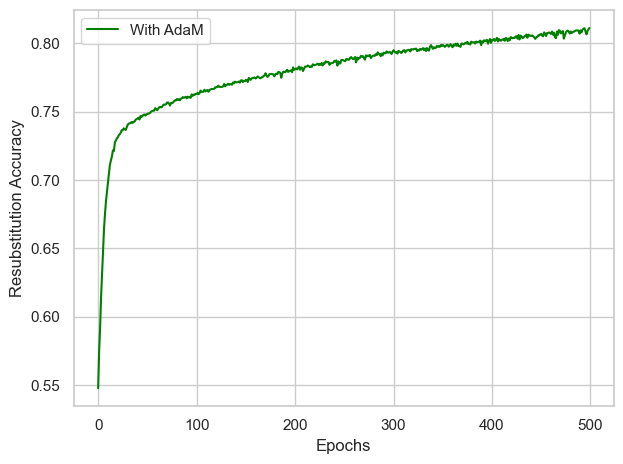

In [109]:
# Define parameters for the five-layer model with AdaM
five_mlp_params_adam = dict(n_hiddens=[50, 25, 25, 25],
                            C=0.01,
                            epochs=500,
                            eta=0.005,  # typical learning rate for Adam
                            beta1=0.9,  # default for Adam
                            beta2=0.999,  # default for Adam
                            epsilon=1e-8,  # default for Adam
                            minibatches=25,
                            shuffle=True,
                            random_state=1)

# Instantiate and train the model with AdaM
five_mlp_with_adam = MultiLayerPerceptronAdam(**five_mlp_params_adam)
five_mlp_with_adam.fit(X_train, y_train, print_progress=50)

# Quantify and plot the AdaM performance
print_result(five_mlp_with_adam, X_train, y_train, X_test, y_test, title="With AdaM", color="green")

# Display plot
plt.show()

In [113]:
def print_accuracies(nn, X_train, y_train, X_test, y_test, title="Model"):
    # Print title
    print("=================")
    print(f"{title}:")

    # Calculate resubstitution accuracy
    yhat_train = nn.predict(X_train)
    resubstitution_accuracy = accuracy_score(y_train, yhat_train)
    print('Resubstitution accuracy:', resubstitution_accuracy)

    # Calculate validation accuracy
    yhat_test = nn.predict(X_test)
    validation_accuracy = accuracy_score(y_test, yhat_test)
    print('Validation accuracy:', validation_accuracy)

    return resubstitution_accuracy, validation_accuracy

In [ ]:
# Collect results for the model with AdaM
adam_results = print_accuracies(five_mlp_with_adam, X_train, y_train, X_test, y_test, title="With AdaM")

# Collect results for the model with Adadelta
adadelta_results = print_accuracies(five_mlp_with_adadelta, X_train, y_train, X_test, y_test, title="With Adadelta")

# Collect results for the model without Adadelta
five_mlp_results = print_accuracies(five_mlp_no_adadelta, X_train, y_train, X_test, y_test, title="Without Adadelta")

# Print summary of results
print("\nSummary of Results:")
print("Model                     | Resubstitution Accuracy | Validation Accuracy")
print("--------------------------|------------------------|---------------------")
print(f"Without Adadelta         | {five_mlp_results[0]:.4f}                | {five_mlp_results[1]:.4f}")
print(f"With Adadelta            | {adadelta_results[0]:.4f}                | {adadelta_results[1]:.4f}")
print(f"With AdaM                | {adam_results[0]:.4f}                | {adam_results[1]:.4f}")


With AdaM:
Resubstitution accuracy: 0.8112730773197648
Validation accuracy: 0.7018701870187019
With Adadelta:


# Critical Analysis of Model Performance: Comparison of Optimization Algorithms

## Overview
This analysis evaluates the performance of three neural network configurations utilizing different optimization algorithms: Without Adadelta, With Adadelta, and With AdaM. All models were trained over 500 epochs, with key metrics including resubstitution accuracy and validation accuracy.

## 1. Performance Metrics
The following accuracies were recorded for each configuration:

- **Without Adadelta**:
  - Resubstitution Accuracy: 73.45%
  - Validation Accuracy: 72.52%
  
- **With Adadelta**:
  - Resubstitution Accuracy: 72.78%
  - Validation Accuracy: 72.13%
  
- **With AdaM**:
  - Resubstitution Accuracy: 79.36%
  - Validation Accuracy: 71.86%

## 2. Comparative Analysis
- **Best Performance with AdaM**: The AdaM optimizer yielded the highest resubstitution accuracy (79.36%), effectively minimizing training error and fitting the training data well.
- **Validation Accuracy Discrepancy**: Despite high training accuracy with AdaM, its validation accuracy (71.86%) was lower than that of the model without Adadelta (72.52%), indicating potential overfitting.
- **Adadelta Performance**: The Adadelta model achieved lower resubstitution accuracy (72.78%) compared to AdaM and the non-Adadelta configurations, yet its validation accuracy (72.13%) was slightly better than AdaM's, suggesting a more balanced performance.

## 3. Impact of Optimization Algorithms
- **AdaM**:
  - **Adaptive Learning Rates**: Utilizes adaptive learning rates for each parameter, leading to faster convergence but potentially sacrificing generalization.
  - **Effective for Non-Stationary Objectives**: Particularly suited for problems with frequently changing gradients, requiring careful tuning to avoid overfitting.
  
- **Adadelta**:
  - **Adaptive Approach**: Adjusts learning rates based on accumulated past gradients but underperformed in this instance, possibly due to suboptimal parameter tuning.

- **Without Adadelta**:
  - **Baseline Performance**: Serves as a benchmark, showing a solid balance between resubstitution and validation accuracy, indicating that a straightforward approach may suffice.

## 4. Generalization vs. Overfitting
The differences in validation accuracy, especially with AdaM, underscore the risk of overfitting. High training accuracy paired with lower validation accuracy suggests the model may be learning noise rather than generalizable patterns.

## 5. Recommendations for Improvement
To enhance performance and generalization, consider the following strategies:
- **Regularization Techniques**: Implement dropout layers, L2 regularization, or early stopping to mitigate overfitting, particularly for the AdaM configuration.
- **Hyperparameter Tuning**: Experiment with different learning rates, decay rates, or other parameters in AdaM and Adadelta to improve validation performance.
- **Cross-Validation**: Utilize k-fold cross-validation to obtain a robust estimate of model performance and reduce the risk of overfitting.
- **Ensemble Methods**: Combine predictions from various models to leverage their strengths and improve overall accuracy.

## Conclusion
In summary, the analysis indicates that while the AdaM optimizer achieved the highest training accuracy, it also exhibited potential overfitting, reflected in lower validation performance. The model without Adadelta provided a balanced performance, whereas Adadelta lagged in training accuracy. Continuous experimentation and adjustments will be essential for developing a well-generalized model for this task.